In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)



In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


615

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | mayumba
Processing Record 6 of Set 1 | pangnirtung
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | aquiraz
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 15 of Set 1 | comodoro rivadavia
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | ayan
Processing Record 20 of Set 1 | shubarkuduk
Processi

Processing Record 35 of Set 4 | sungaipenuh
Processing Record 36 of Set 4 | alihe
Processing Record 37 of Set 4 | yeppoon
Processing Record 38 of Set 4 | okhotsk
Processing Record 39 of Set 4 | almaznyy
Processing Record 40 of Set 4 | asyut
Processing Record 41 of Set 4 | banff
Processing Record 42 of Set 4 | nadym
Processing Record 43 of Set 4 | opuwo
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | black river
Processing Record 46 of Set 4 | wanning
Processing Record 47 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 48 of Set 4 | kutum
Processing Record 49 of Set 4 | mbini
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | yining
Processing Record 2 of Set 5 | umm lajj
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | wajir
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | flin flon
Processing Record 8 of Set 5 | dingle
Processing Record

Processing Record 23 of Set 8 | rio gallegos
Processing Record 24 of Set 8 | mar del plata
Processing Record 25 of Set 8 | majene
Processing Record 26 of Set 8 | honningsvag
Processing Record 27 of Set 8 | iaciara
Processing Record 28 of Set 8 | saint-augustin
Processing Record 29 of Set 8 | sibolga
Processing Record 30 of Set 8 | bahia blanca
Processing Record 31 of Set 8 | valdepenas
Processing Record 32 of Set 8 | skibbereen
Processing Record 33 of Set 8 | lipova
Processing Record 34 of Set 8 | avera
Processing Record 35 of Set 8 | labelle
Processing Record 36 of Set 8 | aras
Processing Record 37 of Set 8 | iquique
Processing Record 38 of Set 8 | salacgriva
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | yarada
Processing Record 41 of Set 8 | krasnoselkup
Processing Record 42 of Set 8 | porto velho
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | yeniseysk
Processing Record 45 of Set 8 | hami
Processing Record 46 of Set 8 | luanda
Pro

Processing Record 9 of Set 12 | medina
Processing Record 10 of Set 12 | port shepstone
Processing Record 11 of Set 12 | zaysan
Processing Record 12 of Set 12 | teacapan
Processing Record 13 of Set 12 | yulara
Processing Record 14 of Set 12 | mutsalaul
Processing Record 15 of Set 12 | sistranda
Processing Record 16 of Set 12 | sakaraha
Processing Record 17 of Set 12 | beatrice
Processing Record 18 of Set 12 | sindand
City not found. Skipping...
Processing Record 19 of Set 12 | sechura
Processing Record 20 of Set 12 | zhangye
Processing Record 21 of Set 12 | kongolo
Processing Record 22 of Set 12 | mocuba
Processing Record 23 of Set 12 | tawnat
City not found. Skipping...
Processing Record 24 of Set 12 | actopan
Processing Record 25 of Set 12 | mokhsogollokh
Processing Record 26 of Set 12 | burnie
Processing Record 27 of Set 12 | kasongo-lunda
Processing Record 28 of Set 12 | moron
Processing Record 29 of Set 12 | bowen
Processing Record 30 of Set 12 | sinnamary
Processing Record 31 of S

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,61.92,75,100,1.01,AU,2022-03-22 04:40:11
1,Cabo San Lucas,22.8909,-109.9124,68.61,54,13,4.47,MX,2022-03-22 04:38:55
2,Mayumba,-3.4320,10.6554,77.27,91,100,6.22,GA,2022-03-22 04:40:12
3,Pangnirtung,66.1451,-65.7125,-13.54,76,73,5.95,CA,2022-03-22 04:40:12
4,Ushuaia,-54.8000,-68.3000,47.86,76,75,2.30,AR,2022-03-22 04:40:13
5,Punta Arenas,-53.1500,-70.9167,51.91,66,75,21.85,CL,2022-03-22 04:40:13
6,Provideniya,64.3833,-173.3000,17.71,62,0,4.00,RU,2022-03-22 04:40:13
7,Busselton,-33.6500,115.3333,74.86,32,1,6.02,AU,2022-03-22 04:40:14
8,Nikolskoye,59.7035,30.7861,34.88,90,19,6.08,RU,2022-03-22 04:40:14
9,Aquiraz,-3.9014,-38.3911,75.29,87,96,5.95,BR,2022-03-22 04:40:15


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-03-22 04:40:11,-42.7826,147.0587,61.92,75,100,1.01
1,Cabo San Lucas,MX,2022-03-22 04:38:55,22.8909,-109.9124,68.61,54,13,4.47
2,Mayumba,GA,2022-03-22 04:40:12,-3.4320,10.6554,77.27,91,100,6.22
3,Pangnirtung,CA,2022-03-22 04:40:12,66.1451,-65.7125,-13.54,76,73,5.95
4,Ushuaia,AR,2022-03-22 04:40:13,-54.8000,-68.3000,47.86,76,75,2.30


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

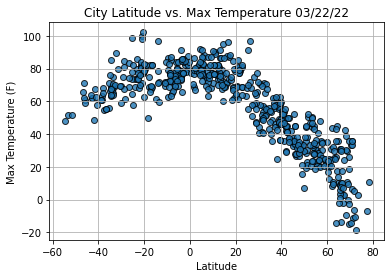

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

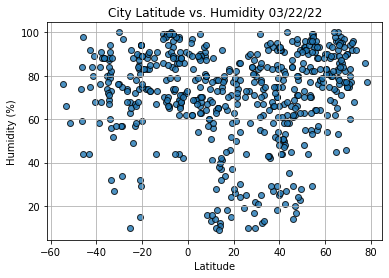

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

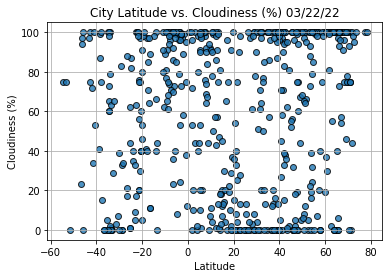

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

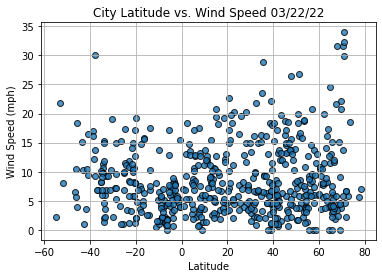

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                     Bengkulu
Country                        ID
Date          2022-03-22 04:40:16
Lat                       -3.8004
Lng                      102.2655
Max Temp                    85.48
Humidity                       62
Cloudiness                     99
Wind Speed                   7.31
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
552     True
553     True
554     True
555     True
556    False
Name: Lat, Length: 557, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cabo San Lucas,MX,2022-03-22 04:38:55,22.8909,-109.9124,68.61,54,13,4.47
3,Pangnirtung,CA,2022-03-22 04:40:12,66.1451,-65.7125,-13.54,76,73,5.95
6,Provideniya,RU,2022-03-22 04:40:13,64.3833,-173.3000,17.71,62,0,4.00
8,Nikolskoye,RU,2022-03-22 04:40:14,59.7035,30.7861,34.88,90,19,6.08
10,Albany,US,2022-03-22 04:36:06,42.6001,-73.9662,41.36,53,38,4.00


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


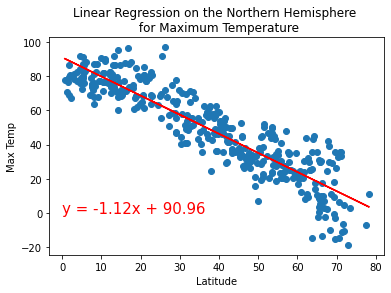

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

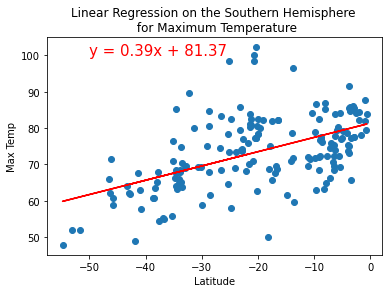

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,100))

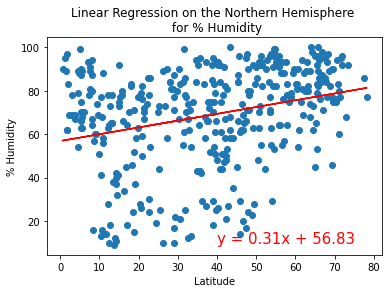

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

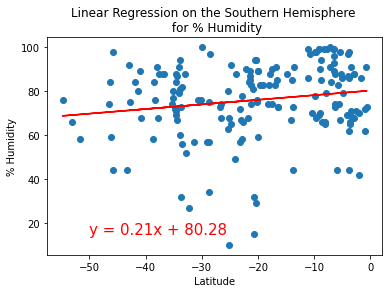

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

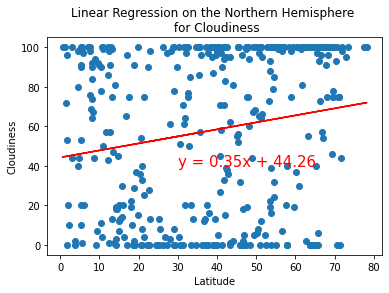

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(30,40))

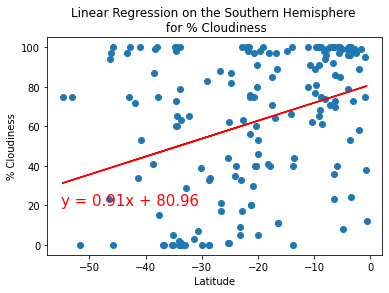

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,20))

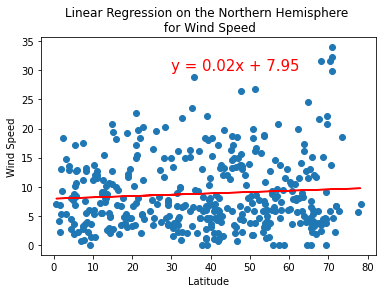

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,30))

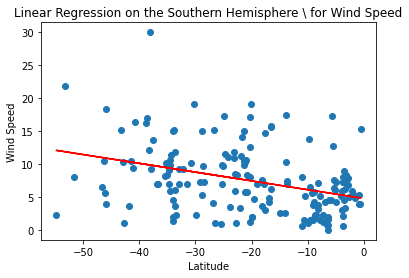

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,35))